This document covers:

* **Image Plots/Heatmaps** (`ax.imshow`): Displaying 2D array data, useful for showing matrices or correlations. Includes colormaps and colorbars.
* **Contour Plots** (`ax.contour`, `ax.contourf`): Visualizing 3D surfaces in 2D using lines or filled regions representing levels of constant value.
* **3D Plotting** (`mpl_toolkits.mplot3d`): Creating `axes` with a 3D projection and generating plots like 3D scatter plots (`ax.scatter`), surface plots (`ax.plot_surface`), and wireframe plots (`ax.plot_wireframe`).

These plots allow you to visualize more complex datasets beyond simple 1D or 2D relationships.

--- 1. Image Plot (imshow) ---


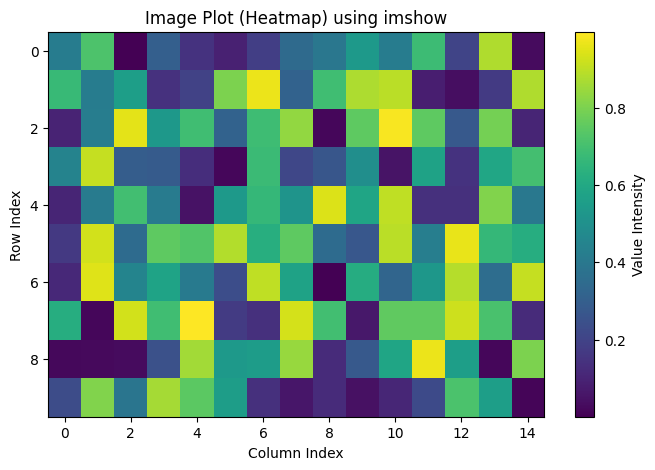

Generated Image Plot (Heatmap).
------------------------------
--- 2. Contour Plots ---


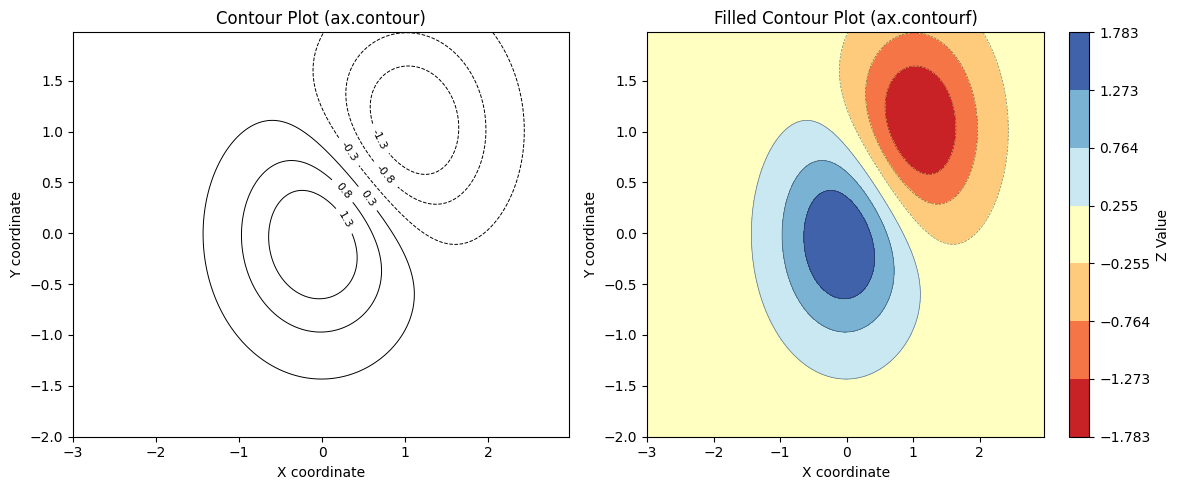

Generated Contour Plots.
------------------------------
--- 3. 3D Plotting ---


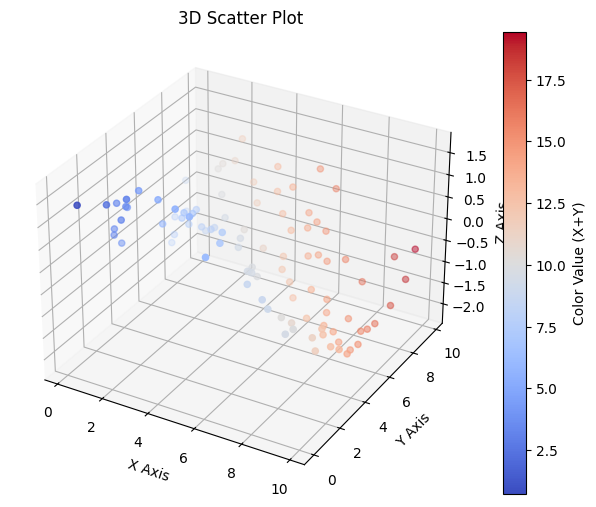

Generated 3D Scatter Plot.


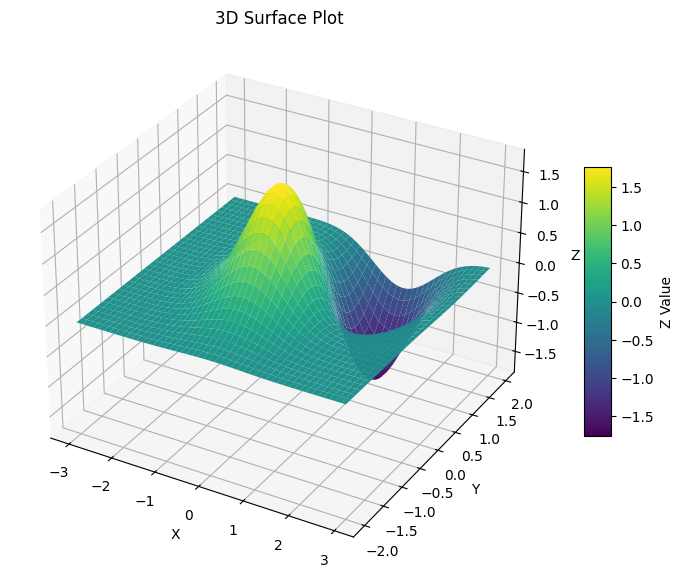

Generated 3D Surface Plot.


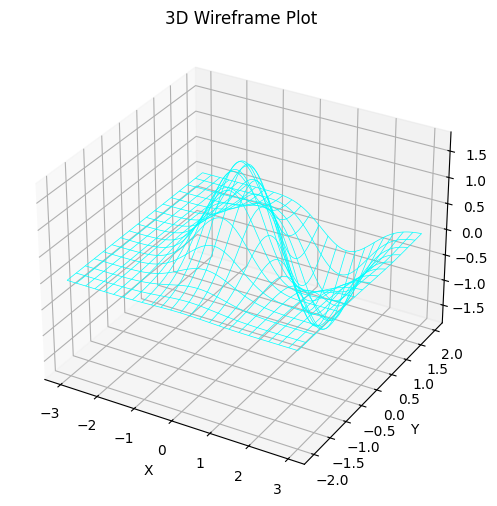

Generated 3D Wireframe Plot.
------------------------------
Other advanced plots like streamplots and polar plots are also available.
------------------------------


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
# Import the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Prepare Sample Data ---

# Data for imshow (heatmap)
np.random.seed(1)
image_data = np.random.rand(10, 15) # 10x15 array of random values between 0 and 1

# Data for contour plots
delta = 0.025
x_contour = np.arange(-3.0, 3.0, delta)
y_contour = np.arange(-2.0, 2.0, delta)
X_contour, Y_contour = np.meshgrid(x_contour, y_contour) # Create coordinate grid
Z1 = np.exp(-X_contour**2 - Y_contour**2)
Z2 = np.exp(-(X_contour - 1)**2 - (Y_contour - 1)**2)
Z_contour = (Z1 - Z2) * 2 # Example function Z(X, Y)

# Data for 3D plots
n_points_3d = 100
x_3d = np.random.rand(n_points_3d) * 10
y_3d = np.random.rand(n_points_3d) * 10
z_3d = np.sin(x_3d * 0.5) + np.cos(y_3d * 0.5) + np.random.randn(n_points_3d) * 0.2
c_3d = x_3d + y_3d # Color based on x+y


# --- 2. Image Plots (Heatmaps) with ax.imshow() ---
# Displays data in a 2D array as an image or heatmap.

print("--- 1. Image Plot (imshow) ---")
fig, ax = plt.subplots(figsize=(8, 5))

im = ax.imshow(image_data, cmap='viridis', interpolation='nearest', aspect='auto')
# cmap: Colormap to use (e.g., 'viridis', 'plasma', 'gray', 'jet')
# interpolation: How to render pixels ('nearest', 'bilinear', etc.)
# aspect: Control aspect ratio ('equal' or 'auto')

ax.set_title('Image Plot (Heatmap) using imshow')
ax.set_xlabel('Column Index')
ax.set_ylabel('Row Index')

# Add a colorbar to show the mapping of values to colors
cbar = fig.colorbar(im)
cbar.set_label('Value Intensity')

plt.show()
print("Generated Image Plot (Heatmap).")
print("-" * 30)


# --- 3. Contour Plots ---
# Visualize 3D data (Z values on an X-Y grid) using contour lines or filled areas.

print("--- 2. Contour Plots ---")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# a) Contour lines (ax.contour)
ax1 = axs[0]
levels = np.linspace(Z_contour.min(), Z_contour.max(), 8) # Define contour levels
CS = ax1.contour(X_contour, Y_contour, Z_contour, levels=levels, colors='k', linewidths=0.7)
# Add labels to contour lines
ax1.clabel(CS, inline=True, fontsize=8, fmt='%1.1f')
ax1.set_title('Contour Plot (ax.contour)')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')

# b) Filled contours (ax.contourf)
ax2 = axs[1]
CF = ax2.contourf(X_contour, Y_contour, Z_contour, levels=levels, cmap='RdYlBu')
# Add contour lines on top for clarity
ax2.contour(X_contour, Y_contour, Z_contour, levels=levels, colors='k', linewidths=0.5, alpha=0.5)
ax2.set_title('Filled Contour Plot (ax.contourf)')
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')

# Add a colorbar for the filled contour plot
cbar_contour = fig.colorbar(CF, ax=ax2)
cbar_contour.set_label('Z Value')

plt.tight_layout()
plt.show()
print("Generated Contour Plots.")
print("-" * 30)


# --- 4. 3D Plotting (mpl_toolkits.mplot3d) ---
# Requires creating axes with projection='3d'.

print("--- 3. 3D Plotting ---")

# a) 3D Scatter Plot
fig = plt.figure(figsize=(8, 6)) # Create a new figure
ax_3d_scatter = fig.add_subplot(111, projection='3d') # Add 3D axes

scatter3d = ax_3d_scatter.scatter(x_3d, y_3d, z_3d, c=c_3d, cmap='coolwarm', marker='o', depthshade=True)
# depthshade=True adds shading based on depth

ax_3d_scatter.set_title('3D Scatter Plot')
ax_3d_scatter.set_xlabel('X Axis')
ax_3d_scatter.set_ylabel('Y Axis')
ax_3d_scatter.set_zlabel('Z Axis')

# Add colorbar
cbar_3d = fig.colorbar(scatter3d)
cbar_3d.set_label('Color Value (X+Y)')

plt.show()
print("Generated 3D Scatter Plot.")

# b) 3D Surface Plot
fig = plt.figure(figsize=(9, 7))
ax_3d_surface = fig.add_subplot(111, projection='3d')

# Use the contour data grid (X_contour, Y_contour, Z_contour)
surf = ax_3d_surface.plot_surface(X_contour, Y_contour, Z_contour, cmap='viridis',
                                  linewidth=0.2, antialiased=True, rstride=5, cstride=5) # rstride/cstride subsample grid
# rstride/cstride control how many grid lines are skipped

ax_3d_surface.set_title('3D Surface Plot')
ax_3d_surface.set_xlabel('X')
ax_3d_surface.set_ylabel('Y')
ax_3d_surface.set_zlabel('Z')
ax_3d_surface.view_init(elev=30, azim=-60) # Set viewing angle (elevation, azimuth)

# Add colorbar mapped to Z values
cbar_surf = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar_surf.set_label('Z Value')

plt.show()
print("Generated 3D Surface Plot.")


# c) 3D Wireframe Plot
fig = plt.figure(figsize=(8, 6))
ax_3d_wire = fig.add_subplot(111, projection='3d')

wire = ax_3d_wire.plot_wireframe(X_contour, Y_contour, Z_contour, rstride=10, cstride=10, color='cyan', linewidth=0.5)
# rstride/cstride control line density

ax_3d_wire.set_title('3D Wireframe Plot')
ax_3d_wire.set_xlabel('X')
ax_3d_wire.set_ylabel('Y')
ax_3d_wire.set_zlabel('Z')

plt.show()
print("Generated 3D Wireframe Plot.")
print("-" * 30)


# --- 5. Other Advanced Types (Brief Mention) ---
# - Streamplots (ax.streamplot): Visualize vector fields.
# - Polar Plots (subplot_kw={'projection': 'polar'}): Plot data in polar coordinates.
# - Quiver Plots (ax.quiver): Plot arrows representing vector fields.
# - Barbs Plots (ax.barbs): Plot wind barbs.

print("Other advanced plots like streamplots and polar plots are also available.")
print("-" * 30)